#### Загрузим данные и посмотрим на них

In [1]:
import warnings
import matplotlib.pyplot as plt

from pandas import DataFrame

warnings.filterwarnings("ignore")

!pip install pandas -q

import pandas as pd
# Хак чтобы работало на Anaconda под MacOs 10.15.7 Catalina
pd.DataFrame.iteritems = pd.DataFrame.items

In [2]:
!pip install plotly -q

import plotly.graph_objects as go

def linear_plot(df, title):
    fig = go.Figure([go.Scatter(x=df['date'], y=df['close'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.show()

def candlestick_plot(df, title):
    fig = go.Figure([go.Candlestick(x=df['date'],
                                open=df['open'],
                                high=df['high'],
                                low=df['low'],
                                close=df['close'])])
    fig.update_layout(xaxis_rangeslider_visible=False,
                      plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.update_yaxes(fixedrange=False)
    fig.show()

In [106]:
!pip install ccxt -q

import ccxt
import time

def get_data(symbol, timeframe, since):
    exchange = ccxt.binance()
    since = exchange.parse8601(since)
    all_ohlcvs = []
    
    while True:
        try:
            ohlcvs = exchange.fetch_ohlcv(symbol, timeframe, since)
            all_ohlcvs += ohlcvs
            if len(ohlcvs):
                print('Fetched', len(ohlcvs), symbol, timeframe, 'candles from', exchange.iso8601(ohlcvs[0][0]))
                since = ohlcvs[-1][0] + 1
                sleep_interval = exchange.rateLimit / 1000
                print('Sleep for', sleep_interval)
                time.sleep(sleep_interval)
            else:
                break
        except Exception as e:
            print(type(e).__name__, str(e))
    print('Fetched', len(all_ohlcvs), symbol, timeframe, 'candles in total')
    
    df = pd.DataFrame(all_ohlcvs)
    df.columns = ['date','open','high','low','close','volume']
    df = df.sort_values(by='date')
    df = df.drop_duplicates(subset='date').reset_index(drop=True)
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    df.to_csv(symbol.replace('/', '_') + '_' + timeframe + '.csv', index=False)
    return df

In [143]:
df = get_data('ETH/USDT', '1h', '2024-01-01T00:00:00Z')
df

Fetched 500 ETH/USDT 1h candles from 2024-01-01T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-01-21T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-02-11T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-03-03T12:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-03-24T08:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-04-14T04:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-05-05T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-05-25T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-06-15T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-07-06T12:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-07-27T08:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-08-17T04:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-09-07T00:00:00.000Z
Sleep for 0.05

date     open     high      low    close      volume
0    2024-01-01 00:00:00  2281.87  2297.18  2281.27  2295.51  10771.9183
1    2024-01-01 01:00:00  2295.52  2306.60  2292.90  2303.72   8413.4260
2    2024-01-01 02:00:00  2303.72  2304.72  2291.20  2293.02   5808.2533
3    2024-01-01 03:00:00  2293.03  2294.50  2271.00  2273.81  10745.7360
4    2024-01-01 04:00:00  2273.80  2279.86  2265.24  2279.55   9681.5762
...                  ...      ...      ...      ...      ...         ...
8988 2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769
8989 2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256
8990 2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213
8991 2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779
8992 2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861

[8993 rows x 6 columns]

In [29]:
linear_plot(df, 'ETH/USDT')

In [144]:
df = pd.read_csv('ETH_USDT_1h.csv')
df = df.sort_values(by='date')
df = df.drop_duplicates(subset='date').reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

open     high      low    close      volume
date                                                               
2024-01-01 00:00:00  2281.87  2297.18  2281.27  2295.51  10771.9183
2024-01-01 01:00:00  2295.52  2306.60  2292.90  2303.72   8413.4260
2024-01-01 02:00:00  2303.72  2304.72  2291.20  2293.02   5808.2533
2024-01-01 03:00:00  2293.03  2294.50  2271.00  2273.81  10745.7360
2024-01-01 04:00:00  2273.80  2279.86  2265.24  2279.55   9681.5762
...                      ...      ...      ...      ...         ...
2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769
2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256
2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861

[8993 rows x 5 columns]

In [4]:
df.shape

(8986, 5)

In [5]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [33]:
df.describe()

open         high          low        close         volume
count  8986.000000  8986.000000  8986.000000  8986.000000    8986.000000
mean   3054.541471  3068.276729  3039.666715  3054.655811   16839.867382
std     509.302984   511.884083   506.345479   509.245256   17840.921145
min    2169.960000  2194.920000  2100.000000  2169.960000      62.606200
25%    2570.020000  2582.060000  2557.237500  2570.087500    7114.248350
50%    3102.890000  3116.555000  3086.310000  3102.960000   11713.143200
75%    3472.197500  3488.962500  3454.985000  3472.207500   20017.034100
max    4086.660000  4107.800000  4062.600000  4086.660000  463263.532900

In [145]:
# Удалим значения где нет объемов
df = df.drop(df[df['volume']==0.0].index)

#### Подключим библиотеки PyTorch

In [6]:
!pip install torch -q

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#### Разобьем данные на обучающую и тестовую выборки

In [146]:
data = df.copy()
window_size = 30
data

open     high      low    close      volume
date                                                               
2024-01-01 00:00:00  2281.87  2297.18  2281.27  2295.51  10771.9183
2024-01-01 01:00:00  2295.52  2306.60  2292.90  2303.72   8413.4260
2024-01-01 02:00:00  2303.72  2304.72  2291.20  2293.02   5808.2533
2024-01-01 03:00:00  2293.03  2294.50  2271.00  2273.81  10745.7360
2024-01-01 04:00:00  2273.80  2279.86  2265.24  2279.55   9681.5762
...                      ...      ...      ...      ...         ...
2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769
2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256
2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861

[8993 rows x 5 columns]

In [147]:
def get_data_loader(data):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)

        if data['close'].iloc[i + window_size] > data['close'].iloc[i + window_size - 1]:
            y.append(2)  # Buy
        elif data['close'].iloc[i + window_size] < data['close'].iloc[i + window_size - 1]:
            y.append(0)  # Sell
        else:
            y.append(1)  # Hold

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=32, shuffle=False)

In [148]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=3)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 6784, Test size: 2209


Напишем метод обучения модели и расчета метрик качества

In [149]:
!pip install torcheval-nightly -q
!pip install scikit-image -q

from torcheval.metrics import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def train_model(model, dataloader, num_epochs=10, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)
    
    accuracy = MulticlassAccuracy()
    precision = MulticlassPrecision(num_classes=3)
    recall = MulticlassRecall(num_classes=3)
    f1_score = MulticlassF1Score(num_classes=3)

    all_metrics = []

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            
            accuracy.update(outputs, labels)
            precision.update(outputs, labels)
            recall.update(outputs, labels)
            f1_score.update(outputs, labels)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        metrics = {
            'Loss': loss.item(),
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print("Metrics")
        print(metrics)
        all_metrics.append(metrics)
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
        
    metrics_df = pd.DataFrame(all_metrics)
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Loss'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Loss',
                      title="Loss/Epoch")
    fig.show()
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Accuracy'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Accuracy',
                      title="Accuracy/Epoch")
    fig.show()

#### CNN модель

In [150]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(5, 16, kernel_size=3)  # Input: 5 channels, Output: 16 channels
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
        self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
        self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
        x = torch.relu(self.fc1(x))
        return self.fc2(x)  # Return logits (raw output) for each class

Обучим модель

In [151]:
cnn = CNN()
train_model(cnn, loader_train)

Epoch [1/10]
Metrics
{'Loss': 0.20380830764770508, 'Precision': 0.48623037338256836, 'Recall': 0.48623037338256836, 'Accuracy': 0.48623037338256836, 'F1-Score': 0.48623037338256836}
Epoch [2/10]
Metrics
{'Loss': 1.892478585243225, 'Precision': 0.49777910113334656, 'Recall': 0.49777910113334656, 'Accuracy': 0.49777910113334656, 'F1-Score': 0.49777910113334656}
Epoch [3/10]
Metrics
{'Loss': 0.31109684705734253, 'Precision': 0.5130293369293213, 'Recall': 0.5130293369293213, 'Accuracy': 0.5130293369293213, 'F1-Score': 0.5130293369293213}
Epoch [4/10]
Metrics
{'Loss': 0.6300277709960938, 'Precision': 0.5287237167358398, 'Recall': 0.5287237167358398, 'Accuracy': 0.5287237167358398, 'F1-Score': 0.5287237167358398}
Epoch [5/10]
Metrics
{'Loss': 0.6098726391792297, 'Precision': 0.5384957194328308, 'Recall': 0.5384957194328308, 'Accuracy': 0.5384957194328308, 'F1-Score': 0.5384957194328308}
Epoch [6/10]
Metrics
{'Loss': 0.23696649074554443, 'Precision': 0.5506366491317749, 'Recall': 0.5506366491

Посмотрим на предсказания на тестовых данных

In [152]:
!pip install torcheval-nightly -q
!pip install scikit-image -q

from torcheval.metrics import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def predict(model, loader):
    model.eval()
    
    all_predictions = []
    all_targets = []

    accuracy = MulticlassAccuracy()
    precision = MulticlassPrecision(num_classes=3)
    recall = MulticlassRecall(num_classes=3)
    f1_score = MulticlassF1Score(num_classes=3)
    
    with torch.no_grad():
        for inputs, targets in loader:
            # print("Inputs")
            # print(f"Inputs shape: {inputs.shape}")
            # print(f"Inputs data: {inputs}")
            # print(f"Targets shape: {targets.shape}")
            # print(f"Targets data: {targets.data}")
            outputs = model(inputs)
            
            accuracy.update(outputs, targets)
            precision.update(outputs, targets)
            recall.update(outputs, targets)
            f1_score.update(outputs, targets)
            
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.numpy())
            all_targets.extend(targets.numpy())
        
        metrics = {
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print(f"Metrics {metrics}")
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
    return all_predictions, all_targets

In [153]:
# Plot actual vs predicted labels
def plot(all_predictions, all_targets, title):
    plt.figure(figsize=(12, 6))
    plt.plot(all_targets[-90:], label='Actual', color='blue', linestyle='--', alpha=0.3)
    plt.plot(all_predictions[-90:], label='Predicted', color='red', alpha=0.7)
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Signal (0=Sell, 1=Hold, 2=Buy)")
    plt.legend()
    plt.show()

Metrics {'Precision': 0.4988526701927185, 'Recall': 0.4988526701927185, 'Accuracy': 0.4988526701927185, 'F1-Score': 0.4988526701927185}


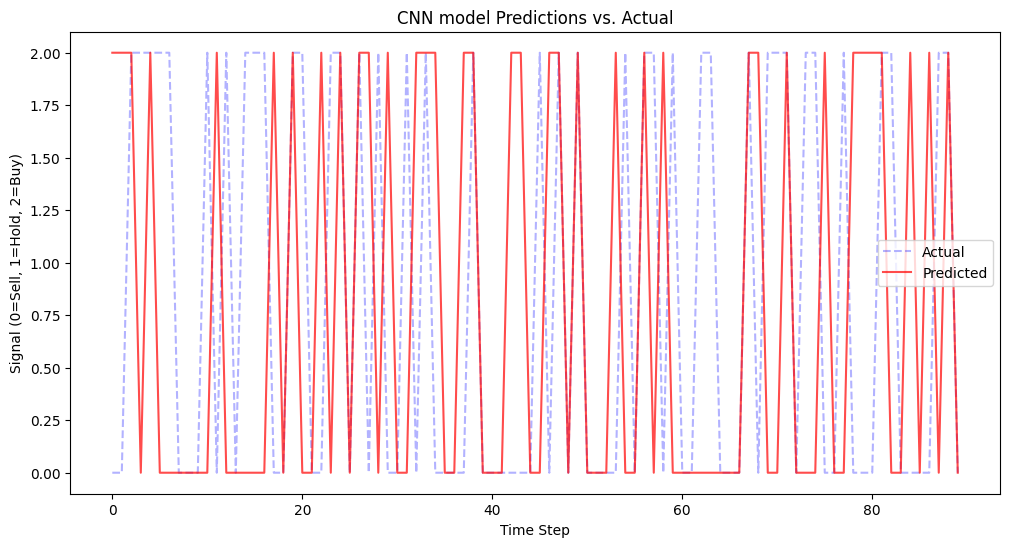

In [154]:
all_predictions, all_targets = predict(cnn, loader_test)
plot(all_predictions, all_targets, "CNN model Predictions vs. Actual")

In [155]:
test_data

open     high      low    close      volume
date                                                               
2024-10-09 16:00:00  2461.30  2462.61  2431.00  2434.13  12198.3304
2024-10-09 17:00:00  2434.14  2440.42  2428.47  2434.25   5908.7752
2024-10-09 18:00:00  2434.24  2437.35  2409.00  2415.20  16172.0552
2024-10-09 19:00:00  2415.21  2421.77  2407.43  2418.30   6483.9721
2024-10-09 20:00:00  2418.30  2418.30  2353.20  2356.17  35129.2375
...                      ...      ...      ...      ...         ...
2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769
2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256
2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861

[2209 rows x 5 columns]

In [156]:
test_data_df = test_data.copy()
test_data_df = test_data_df.reset_index()
test_data_df

date     open     high      low    close      volume
0    2024-10-09 16:00:00  2461.30  2462.61  2431.00  2434.13  12198.3304
1    2024-10-09 17:00:00  2434.14  2440.42  2428.47  2434.25   5908.7752
2    2024-10-09 18:00:00  2434.24  2437.35  2409.00  2415.20  16172.0552
3    2024-10-09 19:00:00  2415.21  2421.77  2407.43  2418.30   6483.9721
4    2024-10-09 20:00:00  2418.30  2418.30  2353.20  2356.17  35129.2375
...                  ...      ...      ...      ...      ...         ...
2204 2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769
2205 2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256
2206 2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213
2207 2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779
2208 2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861

[2209 rows x 6 columns]

In [37]:
len(all_predictions)

2179

Необходимо добавить сигналы в тестовый набор данных для прохождения бэктеста

In [157]:
predictions_df = pd.DataFrame(all_predictions, columns=['signal'])
predictions_df

signal
0          0
1          2
2          0
3          2
4          2
...      ...
2174       0
2175       2
2176       0
2177       2
2178       0

[2179 rows x 1 columns]

In [158]:
predictions_df.index = test_data_df.index[window_size:]
df = pd.concat([test_data_df, predictions_df], axis=1).dropna()
df

date     open     high      low    close      volume  \
30   2024-10-10 22:00:00  2387.08  2387.08  2371.60  2377.96   5745.9422   
31   2024-10-10 23:00:00  2377.96  2386.50  2377.96  2386.49   2980.9776   
32   2024-10-11 00:00:00  2386.49  2390.82  2382.00  2386.32   5004.8474   
33   2024-10-11 01:00:00  2386.31  2415.40  2381.86  2406.90  10709.3364   
34   2024-10-11 02:00:00  2406.91  2410.70  2394.77  2400.12   8111.2762   
...                  ...      ...      ...      ...      ...         ...   
2204 2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769   
2205 2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256   
2206 2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213   
2207 2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779   
2208 2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861   

      signal  
30       0.0  
31       2.0  
32       0.0  
33       2.0  
34       2.0  
...      ...  
2204     0.0  
2205     2.0  
2206     0.0  
2207     2.0  
2208     0.0  

[2179 rows x 7 columns]

In [159]:
df.columns = df.columns.str.capitalize()
df

Date     Open     High      Low    Close      Volume  \
30   2024-10-10 22:00:00  2387.08  2387.08  2371.60  2377.96   5745.9422   
31   2024-10-10 23:00:00  2377.96  2386.50  2377.96  2386.49   2980.9776   
32   2024-10-11 00:00:00  2386.49  2390.82  2382.00  2386.32   5004.8474   
33   2024-10-11 01:00:00  2386.31  2415.40  2381.86  2406.90  10709.3364   
34   2024-10-11 02:00:00  2406.91  2410.70  2394.77  2400.12   8111.2762   
...                  ...      ...      ...      ...      ...         ...   
2204 2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769   
2205 2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256   
2206 2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213   
2207 2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779   
2208 2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861   

      Signal  
30       0.0  
31       2.0  
32       0.0  
33       2.0  
34       2.0  
...      ...  
2204     0.0  
2205     2.0  
2206     0.0  
2207     2.0  
2208     0.0  

[2179 rows x 7 columns]

In [160]:
df.rename(columns={'Date': 'Datetime'}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index('Datetime', inplace=True)
df["Signal"] = df["Signal"].astype(int)
df

Open     High      Low    Close      Volume  Signal
Datetime                                                                   
2024-10-10 22:00:00  2387.08  2387.08  2371.60  2377.96   5745.9422       0
2024-10-10 23:00:00  2377.96  2386.50  2377.96  2386.49   2980.9776       2
2024-10-11 00:00:00  2386.49  2390.82  2382.00  2386.32   5004.8474       0
2024-10-11 01:00:00  2386.31  2415.40  2381.86  2406.90  10709.3364       2
2024-10-11 02:00:00  2406.91  2410.70  2394.77  2400.12   8111.2762       2
...                      ...      ...      ...      ...         ...     ...
2025-01-09 12:00:00  3301.41  3310.31  3280.86  3296.20  10210.5769       0
2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.4256       2
2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.5213       0
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.3779       2
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.51  24336.4861       0

[2179 rows x 6 columns]

In [161]:
!pip install backtesting -q

from backtesting import Backtest, Strategy

class CNNStrategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.Signal)
        self.previous_signal = 1
        #self.already_bought = False
        self.size = 0.1

    def next(self):
        current_signal = self.signal[-1]
        
        # if current_signal == 2 and self.already_bought == False:
        #     self.buy()
        #     self.already_bought = True
        # elif current_signal == 0 and self.already_bought == True:
        #     self.sell()
        #     self.already_bought = False
        # else:
        #     pass

        if current_signal != self.previous_signal:
            if current_signal == 2:
                if self.position.is_short:
                    self.position.close()

                if not self.position.is_long:
                    self.buy(size=self.size)
                    #self.buy()

            elif current_signal == 0:
                if self.position.is_long:
                    self.position.close()

                if not self.position.is_short:
                    self.sell(size=self.size)
                    #self.sell()

            elif current_signal == 1:
                if self.position:
                    self.position.close()

        self.previous_signal = current_signal

In [162]:
# Создаем объект класса Backtest с текущей стратегией
bt = Backtest(df, CNNStrategy, cash=1_000_000, commission=.002, exclusive_orders=True)

# Запускаем бэктест
stats = bt.run()
bt.plot()

GridPlot(id='p8836', ...)

In [163]:
print(stats)

Start                     2024-10-10 22:00:00
End                       2025-01-09 16:00:00
Duration                     90 days 18:00:00
Exposure Time [%]                   99.908215
Equity Final [$]                 820709.76692
Equity Peak [$]                     1000000.0
Return [%]                         -17.929023
Buy & Hold Return [%]               38.879964
Return (Ann.) [%]                  -54.337827
Volatility (Ann.) [%]                3.076281
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -18.041576
Avg. Drawdown [%]                  -18.041576
Max. Drawdown Duration       90 days 17:00:00
Avg. Drawdown Duration       90 days 17:00:00
# Trades                                  997
Win Rate [%]                        37.011033
Best Trade [%]                       4.565869
Worst Trade [%]                     -6.495276
Avg. Trade [%]                    

В результате получили убыток, судя по всему наша модель плохо обучилась и не дает нужных результатов

In [164]:
df = get_data('ETH/USDT', '1h', '2020-01-01T00:00:00Z')
df

Fetched 500 ETH/USDT 1h candles from 2020-01-01T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-01-21T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-02-11T17:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-03-03T18:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-03-24T15:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-04-14T11:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-05-05T09:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-05-26T05:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-06-16T01:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-07-07T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-07-27T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-08-17T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-09-07T12:00:00.000Z
Sleep for 0.05

date     open     high      low    close       volume
0     2020-01-01 00:00:00   129.16   129.19   128.68   128.87   7769.17336
1     2020-01-01 01:00:00   128.87   130.65   128.78   130.64  11344.65516
2     2020-01-01 02:00:00   130.63   130.98   130.35   130.85   7603.35623
3     2020-01-01 03:00:00   130.85   130.89   129.94   130.20   4968.55433
4     2020-01-01 04:00:00   130.21   130.74   130.15   130.20   3397.90747
...                   ...      ...      ...      ...      ...          ...
44021 2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.42560
44022 2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.52130
44023 2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.37790
44024 2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.76  24390.65870
44025 2025-01-09 17:00:00  3302.75  3304.40  3293.50  3297.64   2127.00170

[44026 rows x 6 columns]

In [165]:
linear_plot(df, 'ETH/USDT')

In [182]:
df = pd.read_csv('ETH_USDT_1h.csv')
df = df.sort_values(by='date')
df = df.drop_duplicates(subset='date').reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

open     high      low    close       volume
date                                                                
2020-01-01 00:00:00   129.16   129.19   128.68   128.87   7769.17336
2020-01-01 01:00:00   128.87   130.65   128.78   130.64  11344.65516
2020-01-01 02:00:00   130.63   130.98   130.35   130.85   7603.35623
2020-01-01 03:00:00   130.85   130.89   129.94   130.20   4968.55433
2020-01-01 04:00:00   130.21   130.74   130.15   130.20   3397.90747
...                      ...      ...      ...      ...          ...
2025-01-09 13:00:00  3296.21  3298.99  3213.00  3221.04  45027.42560
2025-01-09 14:00:00  3221.04  3253.20  3210.28  3251.30  41712.52130
2025-01-09 15:00:00  3251.30  3337.00  3244.29  3320.58  32545.37790
2025-01-09 16:00:00  3320.57  3327.91  3288.01  3302.76  24390.65870
2025-01-09 17:00:00  3302.75  3304.40  3293.50  3297.64   2127.00170

[44026 rows x 5 columns]

In [111]:
df.shape

(44025, 5)

In [112]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [113]:
df.describe()

open          high           low         close         volume
count  44025.000000  44025.000000  44025.000000  44025.000000   44025.000000
mean    1988.074281   1998.897909   1976.478581   1988.146058   26859.627522
std     1149.457245   1155.627720   1142.747244   1149.441062   29196.998793
min       96.510000    105.690000     86.000000     96.620000       0.000000
25%     1254.570000   1262.350000   1248.170000   1254.660000   10130.353130
50%     1872.650000   1878.360000   1866.420000   1872.680000   18164.491000
75%     2913.460000   2928.000000   2896.500000   2913.590000   32692.742000
max     4846.940000   4868.000000   4833.190000   4846.710000  493227.882820

In [183]:
# Удалим значения где нет объемов
df = df.drop(df[df['volume']==0.0].index)

Попробуем обучить модель, используя дополнительные фичи b jgnbvbpfwbb

In [184]:
!pip install scikit-learn -q

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
source_df = df.copy()
scaled_df = pd.DataFrame(scaler.fit_transform(source_df), index=df.index, columns=df.columns)
scaled_df

open      high       low     close    volume
date                                                                 
2020-01-01 00:00:00 -1.617223 -1.617929 -1.616992 -1.617561 -0.653899
2020-01-01 01:00:00 -1.617475 -1.616665 -1.616904 -1.616021 -0.531437
2020-01-01 02:00:00 -1.615944 -1.616380 -1.615530 -1.615839 -0.659579
2020-01-01 03:00:00 -1.615753 -1.616458 -1.615889 -1.616404 -0.749823
2020-01-01 04:00:00 -1.616310 -1.616588 -1.615705 -1.616404 -0.803618
...                       ...       ...       ...       ...       ...
2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222
2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684
2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703
2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602
2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148

[44024 rows x 5 columns]

In [185]:
data = scaled_df.copy()
window_size = 30
data

open      high       low     close    volume
date                                                                 
2020-01-01 00:00:00 -1.617223 -1.617929 -1.616992 -1.617561 -0.653899
2020-01-01 01:00:00 -1.617475 -1.616665 -1.616904 -1.616021 -0.531437
2020-01-01 02:00:00 -1.615944 -1.616380 -1.615530 -1.615839 -0.659579
2020-01-01 03:00:00 -1.615753 -1.616458 -1.615889 -1.616404 -0.749823
2020-01-01 04:00:00 -1.616310 -1.616588 -1.615705 -1.616404 -0.803618
...                       ...       ...       ...       ...       ...
2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222
2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684
2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703
2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602
2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148

[44024 rows x 5 columns]

In [186]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=3)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 41815, Test size: 2209


In [187]:
cnn = CNN()
train_model(cnn, loader_train, num_epochs=50)

Epoch [1/50]
Metrics
{'Loss': 0.6924388408660889, 'Precision': 0.49998801946640015, 'Recall': 0.49998801946640015, 'Accuracy': 0.49998801946640015, 'F1-Score': 0.49998801946640015}
Epoch [2/50]
Metrics
{'Loss': 0.694023609161377, 'Precision': 0.5053009390830994, 'Recall': 0.5053009390830994, 'Accuracy': 0.5053009390830994, 'F1-Score': 0.5053009390830994}
Epoch [3/50]
Metrics
{'Loss': 0.6952536702156067, 'Precision': 0.5060907006263733, 'Recall': 0.5060907006263733, 'Accuracy': 0.5060907006263733, 'F1-Score': 0.5060907006263733}
Epoch [4/50]
Metrics
{'Loss': 0.694847047328949, 'Precision': 0.5039846897125244, 'Recall': 0.5039846897125244, 'Accuracy': 0.5039846897125244, 'F1-Score': 0.5039846897125244}
Epoch [5/50]
Metrics
{'Loss': 0.6977412700653076, 'Precision': 0.5059231519699097, 'Recall': 0.5059231519699097, 'Accuracy': 0.5059231519699097, 'F1-Score': 0.5059231519699097}
Epoch [6/50]
Metrics
{'Loss': 0.6975907683372498, 'Precision': 0.5073590874671936, 'Recall': 0.5073590874671936, 

In [188]:
#сохраним модель в файл
model_path = 'cnn_model.pt'
torch.save(cnn.state_dict(), model_path)

Metrics {'Precision': 0.519963264465332, 'Recall': 0.519963264465332, 'Accuracy': 0.519963264465332, 'F1-Score': 0.519963264465332}


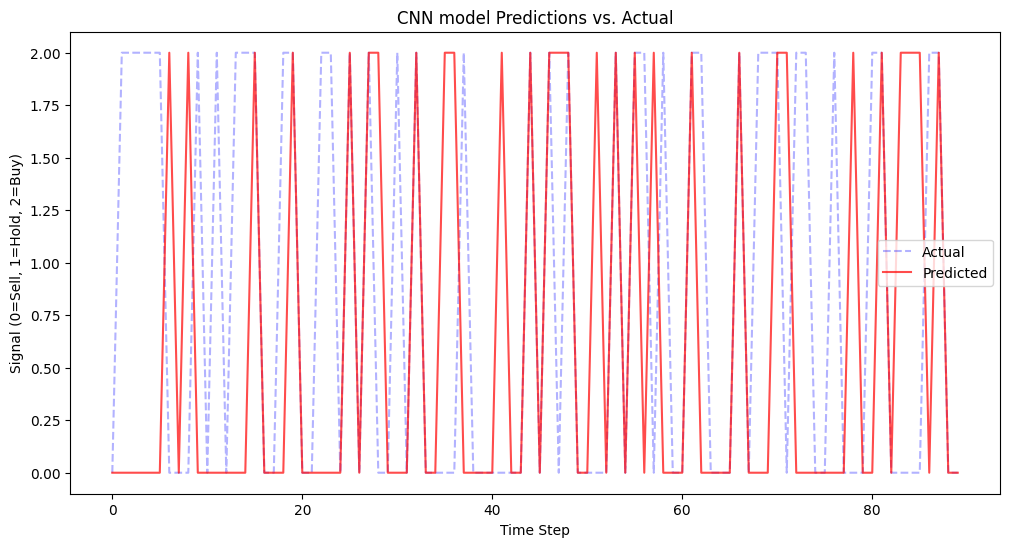

In [189]:
cnn_from_file = CNN()
cnn_from_file.load_state_dict(torch.load(model_path, weights_only=True))

all_predictions, all_targets = predict(cnn_from_file, loader_test)
plot(all_predictions, all_targets, "CNN model Predictions vs. Actual")

In [190]:
test_data_df = test_data.copy()
test_data_df = test_data_df.reset_index()
test_data_df

date      open      high       low     close    volume
0    2024-10-09 17:00:00  0.388026  0.382022  0.395491  0.388065 -0.717619
1    2024-10-09 18:00:00  0.388113  0.379366  0.378453  0.371492 -0.366095
2    2024-10-09 19:00:00  0.371557  0.365884  0.377079  0.374189 -0.697919
3    2024-10-09 20:00:00  0.374246  0.362881  0.329624  0.320137  0.283202
4    2024-10-09 21:00:00  0.320203  0.330181  0.328066  0.339503 -0.460862
...                  ...       ...       ...       ...       ...       ...
2204 2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222
2205 2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684
2206 2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703
2207 2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602
2208 2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148

[2209 rows x 6 columns]

In [191]:
predictions_df = pd.DataFrame(all_predictions, columns=['signal'])
predictions_df

signal
0          2
1          2
2          2
3          0
4          2
...      ...
2174       2
2175       0
2176       2
2177       0
2178       0

[2179 rows x 1 columns]

In [192]:
predictions_df.index = test_data_df.index[window_size:]
df = pd.concat([test_data_df, predictions_df], axis=1).dropna()
df

date      open      high       low     close    volume  \
30   2024-10-10 23:00:00  0.339151  0.335364  0.351291  0.346515 -0.817899   
31   2024-10-11 00:00:00  0.346572  0.339102  0.354826  0.346367 -0.748580   
32   2024-10-11 01:00:00  0.346415  0.360372  0.354704  0.364271 -0.553197   
33   2024-10-11 02:00:00  0.364337  0.356305  0.366001  0.358373 -0.642182   
34   2024-10-11 03:00:00  0.358421  0.361704  0.370674  0.367925 -0.698590   
...                  ...       ...       ...       ...       ...       ...   
2204 2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222   
2205 2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684   
2206 2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703   
2207 2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602   
2208 2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148   

      signal  
30       2.0  
31       2.0  
32       2.0  
33       0.0  
34       2.0  
...      ...  
2204     2.0  
2205     0.0  
2206     2.0  
2207     0.0  
2208     0.0  

[2179 rows x 7 columns]

In [193]:
df.columns = df.columns.str.capitalize()
df

Date      Open      High       Low     Close    Volume  \
30   2024-10-10 23:00:00  0.339151  0.335364  0.351291  0.346515 -0.817899   
31   2024-10-11 00:00:00  0.346572  0.339102  0.354826  0.346367 -0.748580   
32   2024-10-11 01:00:00  0.346415  0.360372  0.354704  0.364271 -0.553197   
33   2024-10-11 02:00:00  0.364337  0.356305  0.366001  0.358373 -0.642182   
34   2024-10-11 03:00:00  0.358421  0.361704  0.370674  0.367925 -0.698590   
...                  ...       ...       ...       ...       ...       ...   
2204 2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222   
2205 2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684   
2206 2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703   
2207 2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602   
2208 2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148   

      Signal  
30       2.0  
31       2.0  
32       2.0  
33       0.0  
34       2.0  
...      ...  
2204     2.0  
2205     0.0  
2206     2.0  
2207     0.0  
2208     0.0  

[2179 rows x 7 columns]

In [194]:
df.rename(columns={'Date': 'Datetime'}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index('Datetime', inplace=True)
df["Signal"] = df["Signal"].astype(int)
df

Open      High       Low     Close    Volume  Signal
Datetime                                                                     
2024-10-10 23:00:00  0.339151  0.335364  0.351291  0.346515 -0.817899       2
2024-10-11 00:00:00  0.346572  0.339102  0.354826  0.346367 -0.748580       2
2024-10-11 01:00:00  0.346415  0.360372  0.354704  0.364271 -0.553197       2
2024-10-11 02:00:00  0.364337  0.356305  0.366001  0.358373 -0.642182       0
2024-10-11 03:00:00  0.358421  0.361704  0.370674  0.367925 -0.698590       2
...                       ...       ...       ...       ...       ...     ...
2025-01-09 13:00:00  1.137995  1.124959  1.082011  1.072554  0.622222       2
2025-01-09 14:00:00  1.072600  1.085336  1.079631  1.098880  0.508684       0
2025-01-09 15:00:00  1.098925  1.157850  1.109392  1.159151  0.194703       2
2025-01-09 16:00:00  1.159188  1.149984  1.147650  1.143649 -0.084602       0
2025-01-09 17:00:00  1.143685  1.129640  1.152455  1.139194 -0.847148       0

[2179 rows x 6 columns]

In [195]:
# Создаем объект класса Backtest с текущей стратегией
bt = Backtest(df, CNNStrategy, cash=1_000_000, commission=.002, exclusive_orders=True)

# Запускаем бэктест
stats = bt.run()
bt.plot()

GridPlot(id='p11260', ...)

In [196]:
print(stats)

Start                     2024-10-10 23:00:00
End                       2025-01-09 17:00:00
Duration                     90 days 18:00:00
Exposure Time [%]                   99.908215
Equity Final [$]                713073.289728
Equity Peak [$]                1035736.374922
Return [%]                         -28.692671
Buy & Hold Return [%]               228.75738
Return (Ann.) [%]                  -73.858784
Volatility (Ann.) [%]                 4.67421
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -31.153013
Avg. Drawdown [%]                   -3.394124
Max. Drawdown Duration       83 days 03:00:00
Avg. Drawdown Duration        8 days 06:00:00
# Trades                                  978
Win Rate [%]                        41.206544
Best Trade [%]                      19.364936
Worst Trade [%]                    -15.903709
Avg. Trade [%]                    

In [ ]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv1d(5, 16, kernel_size=3)  # Input: 5 channels, Output: 16 channels
#         self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
#         self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
#         self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)
# 
#     def forward(self, x):
#         x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
#         x = torch.relu(self.conv1(x))
#         x = torch.relu(self.conv2(x))
#         x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
#         x = torch.relu(self.fc1(x))
#         return self.fc2(x)  # Return logits (raw output) for each class